In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (make sure your CSV file has the correct columns)
dataset = pd.read_csv('fake.csv')

# Check if the dataset is loaded correctly (optional)
print(dataset.head())

# Preprocess the data
X = dataset['Text']  # Column with news content
y = dataset['Label']  # Column with labels (Fake/Real)

# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM model with a linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


   ID                                               Text Label
0   1    "NASA announces the discovery of life on Mars."  Fake
1   2  "Scientists have developed a new cancer treatm...  Real
2   3  "The government is secretly monitoring your ph...  Fake
3   4  "Local company wins prestigious business award...  Real
4   5  "The Earth is flat, and all evidence to the co...  Fake
Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

        Fake       0.00      0.00      0.00         3
        Real       0.40      0.67      0.50         3

    accuracy                           0.33         6
   macro avg       0.20      0.33      0.25         6
weighted avg       0.20      0.33      0.25         6



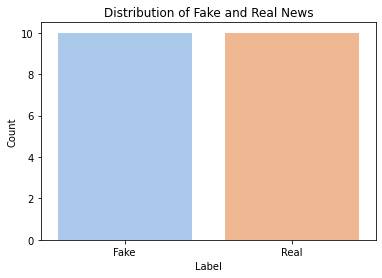

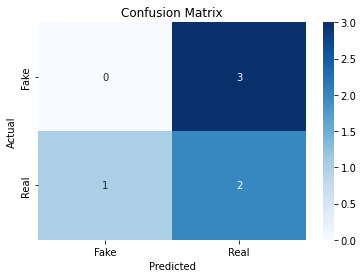

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# 1. Distribution of Labels (Fake vs Real)
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=dataset, palette='pastel')
plt.title('Distribution of Fake and Real News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 2. Confusion Matrix to evaluate the model's performance
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()